# Stack Overflow study
## Table of contents
<ul>
    <li><a href="#Data exploration">Joining the data & exploration</a></li>
    <li><a href="#Analysis">Analysis</a>
        <ul>
            <li><a href="#Q1">Q1 - Is it possible to predict the expected salary and what are the most influencial coefficients to the salary expectation?</a></li>
            <li><a href="#Q2">Q2 - Is it possible to predict how much hours someone spend on looking for job opportunities ?</a></li>
            <li><a href="#Q3">Q3 - Can we predict how many hours someone will work per week?</a></li>
            <li><a href="#Q4">Q4 - How is evolving the popularity of StackOverflow?</a></li>
        </ul>
    </li>
</ul>

<a id='Data exploration'></a>
## Joining the data & exploration

In [1]:
# First I import the libraries I will use
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
# I extract the data I will study, those are the answers to the StackOverflow surveys from 2017, 2018 and 2019
df_2017 = pd.read_csv('Data/survey_results_public_2017.csv', encoding='latin-1')
print('df_2017 : ' + str(df_2017.shape))
df_2018 = pd.read_csv('Data/survey_results_public_2018.csv', encoding='latin-1')
print('df_2018 : ' + str(df_2018.shape))
df_2019 = pd.read_csv('Data/survey_results_public_2019.csv', encoding='latin-1')
print('df_2019 : ' + str(df_2019.shape))

df_2017 : (51392, 154)


C:\Users\quent\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


df_2018 : (98855, 129)
df_2019 : (88883, 85)


In [3]:
# I concatenate the data from all years and I add a column to know if the data is from 2017, 2018 or 2019
df_list = [df_2017, 
           df_2018, 
           df_2019]
var_year = 2017
for df_var in df_list:
    df_var['Year'] = var_year
    var_year += 1
df = pd.concat(df_list, sort=False)


Now I've merge all the data, I take a look ate the full dataset

In [4]:
df.shape

(239130, 335)

In [5]:
df.Year.value_counts()

2018    98855
2019    88883
2017    51392
Name: Year, dtype: int64

In [6]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Trans,Sexuality,Ethnicity,SurveyLength,SurveyEase
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239130 entries, 0 to 88882
Data columns (total 335 columns):
Respondent                          239130 non-null int64
Professional                        51392 non-null object
ProgramHobby                        51392 non-null object
Country                             238586 non-null object
University                          51392 non-null object
EmploymentStatus                    51392 non-null object
FormalEducation                     146095 non-null object
MajorUndergrad                      42841 non-null object
HomeRemote                          44008 non-null object
CompanySize                         110453 non-null object
CompanyType                         38823 non-null object
YearsProgram                        51145 non-null object
YearsCodedJob                       40890 non-null object
YearsCodedJobPast                   974 non-null object
DeveloperType                       36125 non-null object
WebDeveloperType  

In [8]:
df_2019.isnull().sum() / df_2019.shape[0]

Respondent        0.000000
MainBranch        0.006210
Hobbyist          0.000000
OpenSourcer       0.000000
OpenSource        0.022963
Employment        0.019149
Country           0.001485
Student           0.021028
EdLevel           0.028048
UndergradMajor    0.149286
EduOther          0.052012
OrgSize           0.192298
DevType           0.084921
YearsCode         0.010632
Age1stCode        0.014052
YearsCodePro      0.163721
CareerSat         0.180417
JobSat            0.201332
MgrIdiot          0.311916
MgrMoney          0.311938
MgrWant           0.311094
JobSeek           0.093696
LastHireDate      0.101583
LastInt           0.244456
FizzBuzz          0.197327
JobFactors        0.107017
ResumeUpdate      0.123826
CurrencySymbol    0.196787
CurrencyDesc      0.196787
CompTotal         0.370577
                    ...   
BlockchainOrg     0.457995
BlockchainIs      0.323099
BetterLife        0.029409
ITperson          0.019599
OffOn             0.024977
SocialMedia       0.050021
E

In [9]:
df_2017.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary,Year
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000,51392.0
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468,2017.0
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.0
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484,2017.0
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691,2017.0
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806,2017.0
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000,2017.0


<a id='Analysis'></a>
## Analysis

<a id='Q1'></a>
### Q1 - Is it possible to predict the expected salary and what are the most influencial coefficients to the salary expectation?


#### Cleaning the dataset

First I clean the "expected salary" column to remove the NAN values

In [10]:
df_ExpectedSalary = df.dropna(subset=['ExpectedSalary'])

In [11]:
df_ExpectedSalary.shape[0]/df.shape[0]

0.010730564964663573

Only 1% of the values remain for the study

I split the dataset into X and Y matrix

In [12]:
# I select all the columns except the 'ExpectedSalary'
df_X = df_ExpectedSalary.drop(columns='ExpectedSalary')

# I select the 'ExpectedSalary'
Y = df_ExpectedSalary.ExpectedSalary

In [13]:
df_X.select_dtypes(exclude=['object']).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 1 to 51379
Data columns (total 49 columns):
Respondent                   2566 non-null int64
HoursPerWeek                 1209 non-null float64
StackOverflowSatisfaction    2171 non-null float64
Year                         2566 non-null int64
AssessJob1                   0 non-null float64
AssessJob2                   0 non-null float64
AssessJob3                   0 non-null float64
AssessJob4                   0 non-null float64
AssessJob5                   0 non-null float64
AssessJob6                   0 non-null float64
AssessJob7                   0 non-null float64
AssessJob8                   0 non-null float64
AssessJob9                   0 non-null float64
AssessJob10                  0 non-null float64
AssessBenefits1              0 non-null float64
AssessBenefits2              0 non-null float64
AssessBenefits3              0 non-null float64
AssessBenefits4              0 non-null float64
AssessBenefits5     

Then I split the data into numerical and categorical datasets

In [14]:
num_vars = df_X.select_dtypes(exclude=['object'])
cat_vars = df_X.select_dtypes(include=['object'])

I can now fill the empty cells

In [15]:
#I fill the numerical null values with the column average
fill_mean = lambda col: col.fillna(col.mean())
df_X[num_vars.columns] = df_X[num_vars.columns].apply(fill_mean, axis=0)

In [16]:
# I create dummies variables to perform the prediction
# I decided to don't add dunny column for the nan values because of low memory issues
def create_dummies(df, cols):
    for col in cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix = col, prefix_sep = '_', drop_first=True, dummy_na=True)], axis=1)    
    return df

In [17]:
# I store the full dataset into the X matrix
X = create_dummies(df_X, cat_vars.columns)
X

,Respondent,HoursPerWeek,StackOverflowSatisfaction,Year,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,...,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,QuestionsConfusing_nan,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree,InterestedAnswers_nan
1,2,4.805624,8.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
56,57,1.000000,5.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0
114,115,4.805624,5.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
117,118,4.000000,8.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
124,125,0.000000,7.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,1,0,0
178,179,4.805624,8.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0
244,245,4.805624,8.377246,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
271,272,0.000000,7.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
289,290,4.805624,10.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
292,293,1.000000,8.000000,2017,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0


In [18]:
np.sum(X.isnull())

Respondent                                                                                           0
HoursPerWeek                                                                                         0
StackOverflowSatisfaction                                                                            0
Year                                                                                                 0
AssessJob1                                                                                        2566
AssessJob2                                                                                        2566
AssessJob3                                                                                        2566
AssessJob4                                                                                        2566
AssessJob5                                                                                        2566
AssessJob6                                                               

In [19]:
# Some columns are empty, I drop them
X.dropna(axis=1, how='all', inplace = True)

In [20]:
X.head()

,Respondent,HoursPerWeek,StackOverflowSatisfaction,Year,Professional_nan,"ProgramHobby_Yes, I contribute to open source projects","ProgramHobby_Yes, I program as a hobby","ProgramHobby_Yes, both",ProgramHobby_nan,Country_Albania,...,QuestionsConfusing_Disagree,QuestionsConfusing_Somewhat agree,QuestionsConfusing_Strongly agree,QuestionsConfusing_Strongly disagree,QuestionsConfusing_nan,InterestedAnswers_Disagree,InterestedAnswers_Somewhat agree,InterestedAnswers_Strongly agree,InterestedAnswers_Strongly disagree,InterestedAnswers_nan
1,2,4.805624,8.0,2017,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
56,57,1.000000,5.0,2017,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
114,115,4.805624,5.0,2017,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
117,118,4.000000,8.0,2017,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
124,125,0.000000,7.0,2017,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


#### Prediction

In [21]:
# I split the X and Y matrices into train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.3, random_state = 42)

# I define the model I will use
lm_model = LinearRegression(normalize=True)

# I fit the model with the training datasets
lm_model.fit(X_train, Y_train)

# I make a prediction based on the X_test dataset with the trained model
Y_preds = lm_model.predict(X_test)

C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
# I compare the difference between the prediction and the result Y_test
r2score = r2_score(Y_test, Y_preds)
r2score

0.05952773553162449

In [23]:
len(Y_test)

1797

In [24]:
('the r2_score for this data model is {} with {} values').format(r2_score(Y_test, Y_preds), len(Y_test))

'the r2_score for this data model is 0.05952773553162449 with 1797 values'

i define a function to the future predictions I will perform in the workbook

In [25]:
def prediction(X, Y, train_size):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = train_size, random_state = 42)
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, Y_train)
    Y_preds = lm_model.predict(X_test)
    r2score = r2_score(Y_test, Y_preds)
    
    return len(Y_test), r2score

To look for the best R² score, I define a function to test various predictions with a different train size

In [26]:
def best_prediction(X, Y, train_size):
    # I create lists of values tested and the R² score corresponding
    test_size = []
    r2score_test = []
    
    # for each train_size, I perform a prediction and I store the lengh of the test size and the R² score into the lists
    for size in train_size:

        test_lenght, r2score_result = prediction(X, Y, size)

        test_size.append(test_lenght)
        r2score_test.append(r2score_result)
    
    # Then I save the best R² score
    best_result = np.max(r2score_test)
    
    return best_result

In [27]:
# I look for the best R² score I can obtain for this data model
best_prediction(X, Y, np.arange(0.05, 0.3, 0.01))

C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

0.24321978367321073

The best prediction is reached with 2300 test values (split_test = 0.1), the R² score is 0.24
<br>
<br>
<br>
<br>
<br>
I define a function to show which variable has the most influence over the variable predicted

In [28]:
def coef_dataset():
    df_coef = pd.DataFrame()
    
    # I select each column of the X dataset
    df_coef['columns'] = X_train.columns
    
    # I associate the coef and the absolute coef
    df_coef['coef'] = lm_model.coef_
    df_coef['coef_abs'] = np.abs(lm_model.coef_)
    
    # I sort the values
    df_coef = df_coef.sort_values(['coef_abs'], ascending = False)
    return df_coef

In [29]:
coef_dataset()

,columns,coef,coef_abs
1083,ImportantBenefits_Stock options; Health benefi...,76247.477533,76247.477533
53,Country_Iran,43521.672640,43521.672640
3874,WantWorkLanguage_C#; Haskell,40969.029447,40969.029447
7483,MetricAssess_Benchmarked product performance; ...,40969.029447,40969.029447
88,Country_Saudi Arabia,-37157.648586,37157.648586
743,ImportantBenefits_Private office; Professional...,36583.156548,36583.156548
64,Country_Malaysia,-36229.917782,36229.917782
441,ImportantBenefits_Annual bonus; Health benefit...,33216.538584,33216.538584
7953,MetricAssess_Hours worked; Self-rating,30349.787781,30349.787781
519,ImportantBenefits_Annual bonus; Vacation/days ...,-28853.764633,28853.764633


We can predict the Expected Salary mostly with the ImportantBenefits column and a little bit with the Country column as well, but with a low precision (R² = 0.24)

<a id='Q2'></a>
### Q2 - Is it possible to predict how much hours someone spend on looking for job opportunities ?


#### Cleaning the dataset
First I clean the "Hours per week" column to remove the NAN values

In [30]:
df_hpw = df.dropna(subset = ['HoursPerWeek'])
df_hpw.shape[0] / df.shape[0]

0.0861456111738385

Only 8% of the values remain for the study

I split the dataset into X and Y matrix

In [31]:
df_X = df_hpw.drop(columns='HoursPerWeek')
df_Y = df_hpw.HoursPerWeek.drop(columns='HoursPerWeek')

In [32]:
# After dropping the null rows for the Hours per week variable, I drop all the columns without any value
df_X.dropna(axis=1, how='all', inplace=True)

In [33]:
# I split ma dataset into numerical and categorical variables
num_vars = df_X.select_dtypes(include=['float', 'int'])
cat_vars = df_X.select_dtypes(include=['object'])

First I take care of the numerical values by filling the missing values with the mean value of the column

In [34]:
df_X[num_vars.columns] = df_X[num_vars.columns].apply(fill_mean, axis=0)

In [35]:
df_X[num_vars.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20600 entries, 0 to 51391
Data columns (total 2 columns):
StackOverflowSatisfaction    20600 non-null float64
ExpectedSalary               20600 non-null float64
dtypes: float64(2)
memory usage: 482.8 KB


Then I take care of the categorical values by creating dummy variables that will replace the categorical variables

In [36]:
df_X = create_dummies(df_X, cat_vars.columns)

In [37]:
df_X.head()

,Respondent,StackOverflowSatisfaction,ExpectedSalary,Year,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,Professional_nan,"ProgramHobby_Yes, I contribute to open source projects",...,Salary_180000.0,Salary_184000.0,Salary_185000.0,Salary_187200.0,Salary_190000.0,Salary_192000.0,Salary_194000.0,Salary_195000.0,Salary_197000.0,Salary_nan
0,1,9.0,31942.669626,2017,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,10.0,31942.669626,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,6,6.0,31942.669626,2017,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,7,8.0,31942.669626,2017,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,7.0,31942.669626,2017,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Prediction
Now the dataset is ready for the prediction

In [38]:
best_prediction(df_X, df_Y, np.arange(0.001, 0.01, 0.001)) 

C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

0.0063649290697066485

The best R² score found is 0.006 which is very low, the data model used might be not the most appropriated to predict the HoursPerWeek column.
With this data model, we can't predict this variable.

In [39]:
coef_dataset()

,columns,coef,coef_abs
1083,ImportantBenefits_Stock options; Health benefi...,76247.477533,76247.477533
53,Country_Iran,43521.672640,43521.672640
3874,WantWorkLanguage_C#; Haskell,40969.029447,40969.029447
7483,MetricAssess_Benchmarked product performance; ...,40969.029447,40969.029447
88,Country_Saudi Arabia,-37157.648586,37157.648586
743,ImportantBenefits_Private office; Professional...,36583.156548,36583.156548
64,Country_Malaysia,-36229.917782,36229.917782
441,ImportantBenefits_Annual bonus; Health benefit...,33216.538584,33216.538584
7953,MetricAssess_Hours worked; Self-rating,30349.787781,30349.787781
519,ImportantBenefits_Annual bonus; Vacation/days ...,-28853.764633,28853.764633


ImportantBenefits and Country are the 2 main incluencers for the hours someone spend on looking for job opportunities with this data model, but the prediction score is too low to have a precise prediction.

<a id='Q3'></a>
### Q3 - Can we predict how many hours someone will work per week?

#### Cleaning the dataset
First I clean the "WorkWeekHrs" column to remove the NAN values

In [40]:
df_wwh = df.dropna(subset = ['WorkWeekHrs'])
df_wwh.shape[0] / df.shape[0]

0.26974030861874293

Only 27% of the values remain for the study

I split the dataset into X and Y matrix

In [41]:
df_wwh.dropna(how = 'all', axis=1, inplace = True)
df_wwh.shape

C:\Users\quent\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(64503, 86)

Due to low memory availability, I can't perform the prediction. So I select a random sample of 10 000 rows for the prediction

In [42]:
df_wwh = df_wwh.sample(10000)

I split the dataset into X and Y matrices

In [43]:
df_x = df_wwh.drop(columns='WorkWeekHrs')
df_y = df_wwh.WorkWeekHrs

I separate numerical and categorical variables

In [44]:
num_vars = df_x.select_dtypes(include=['float', 'int'])
cat_vars = df_x.select_dtypes(include=['object'])

I fill missing value with the mean of the numerical columns

In [45]:
fill_mean = lambda col: col.fillna(col.mean())
df_x[num_vars.columns] = df_x[num_vars.columns].apply(fill_mean, axis=0)
df_x[num_vars.columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 49621 to 38381
Data columns (total 3 columns):
CompTotal        10000 non-null float64
ConvertedComp    10000 non-null float64
CodeRevHrs       10000 non-null float64
dtypes: float64(3)
memory usage: 312.5 KB


I create dummies for the categorical columns

In [46]:
X = create_dummies(df_x, cat_vars.columns)
X.shape

(10000, 27284)

#### Prediction
I look for the best prediction score

In [47]:
best_prediction(X, df_y, np.arange(0.01, 0.31, 0.05)) 

C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\quent\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are spe

-0.06290055507392611

After various runs of the jupyter notebook, the best R² for the prediction is variating between -0.33 and -0.01. This difference is probably due to the random sample we take at the beginning of the study.

In [48]:
coef_dataset()

,columns,coef,coef_abs
1083,ImportantBenefits_Stock options; Health benefi...,76247.477533,76247.477533
53,Country_Iran,43521.672640,43521.672640
3874,WantWorkLanguage_C#; Haskell,40969.029447,40969.029447
7483,MetricAssess_Benchmarked product performance; ...,40969.029447,40969.029447
88,Country_Saudi Arabia,-37157.648586,37157.648586
743,ImportantBenefits_Private office; Professional...,36583.156548,36583.156548
64,Country_Malaysia,-36229.917782,36229.917782
441,ImportantBenefits_Annual bonus; Health benefit...,33216.538584,33216.538584
7953,MetricAssess_Hours worked; Self-rating,30349.787781,30349.787781
519,ImportantBenefits_Annual bonus; Vacation/days ...,-28853.764633,28853.764633


The variables influencing the most the prediction of the number of worked hours per week are the "ImportantBenefits" and the "Country", but with a R² score so low, I can't trust the prediction. Maybe we need to choose another model to predict the number of worked hours per week.

<a id='Q4'></a>
### Q4 - How is evolving the popularity of StackOverflow?

To answer this question, I will look at the columns
- SOVisit1st : to know how long people know StackOverflow
- SOVisitFreq : to know the frequency of their visit
- SOAccount : to know how much have an account
- SOComm : to know how much users consider themselves as part of the StackOverflow community
- WelcomeChange : to know how do they feel welcomed to StackOverflow compared to the previous year
- Year : to know how much users there is per year

In [49]:
def makeplotv(var, title, x_label, y_label):
    plt.figure(figsize=(15,5))
    plt.bar(var.value_counts().sort_index().index, var.value_counts().sort_index())
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);
def makeploth(var, title, x_label, y_label):
    plt.figure(figsize=(15,5))
    plt.barh(var.value_counts().index, var.value_counts())
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);

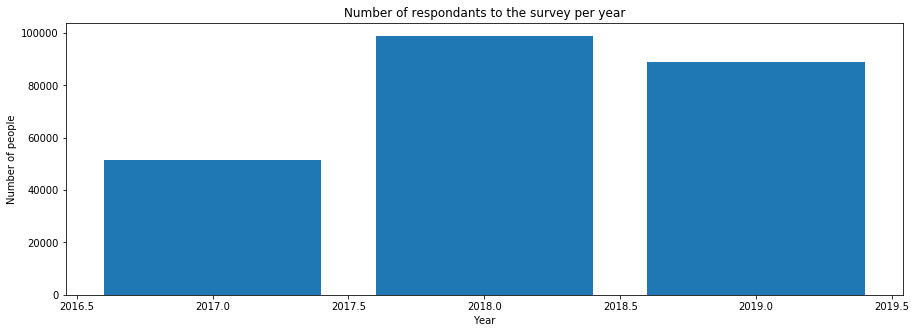

In [50]:
makeplotv(df.Year, 'Number of respondants to the survey per year', 'Year', 'Number of people')

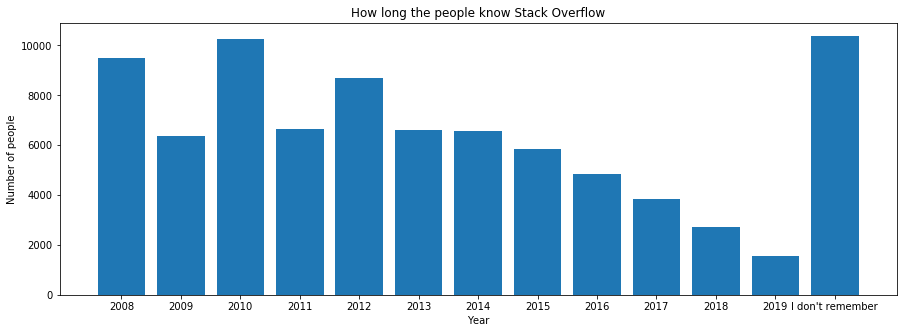

In [56]:
makeplotv(df.SOVisit1st, 'How long the people know Stack Overflow', 'Year', 'Number of people')

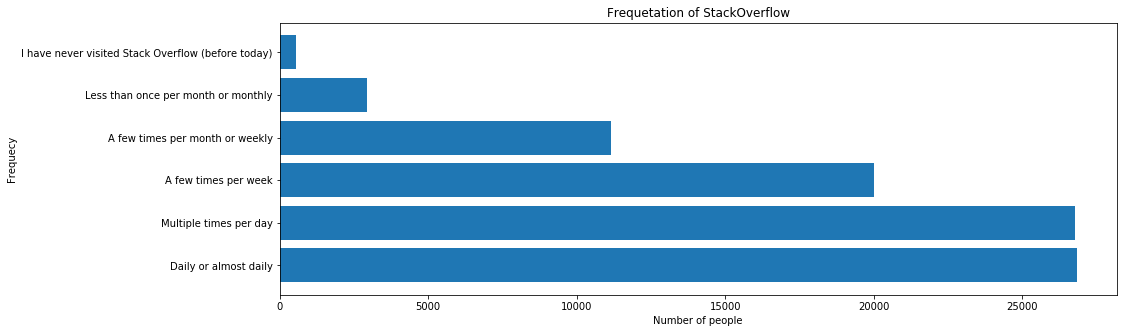

In [52]:
makeploth(df.SOVisitFreq, 'Frequetation of StackOverflow', 'Number of people', 'Frequecy')

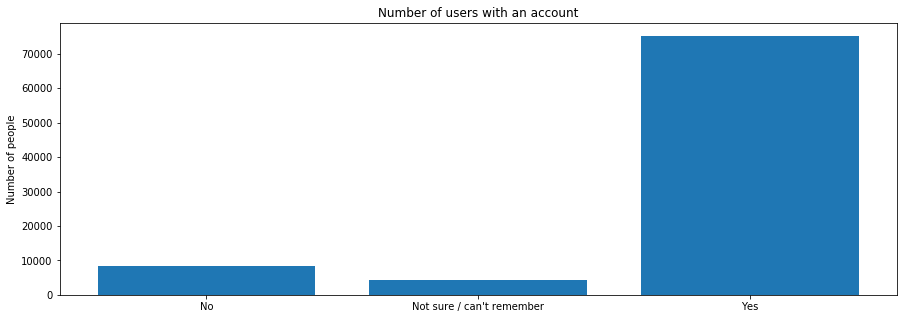

In [53]:
makeplotv(df.SOAccount, 'Number of users with an account', None, 'Number of people')

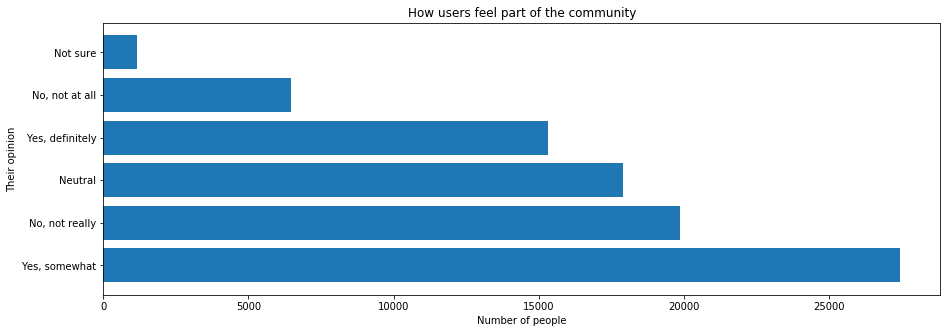

In [54]:
makeploth(df.SOComm, 'How users feel part of the community', 'Number of people', 'Their opinion')

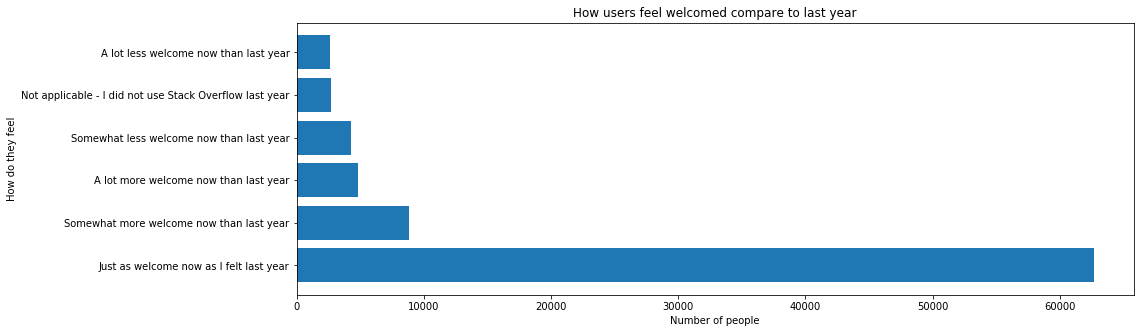

In [55]:
makeploth(df.WelcomeChange, 'How users feel welcomed compare to last year', 'Number of people', 'How do they feel')

Among the people who answered, most of them join the community by created an account but they don't really feel part of the community. The welcome to the site is mostly the same through time.
Since 2014 they are fewer each year to discover Stack Overflow but the frequecy of the frequentation of the site is quite high. 